# Test loading functions


In [1]:
import numpy as np
import torch
import sys, os
sys.path.append(os.path.abspath('..'))

from sep_bk_nn import SepBKNN
from sep_bk_nn.bk_functions import create_bk_dataset
from sep_bk_nn.bk_functions import bk_function_equilateral, bk_function_slow_collider_minus_eq
from torch.utils.data import TensorDataset, DataLoader
#from torchsummary import summary
import matplotlib.pyplot as plt

/mnt/sw/nix/store/71ksmx7k6xy3v9ksfkv5mp5kxxp64pd6-python-3.10.13-view/lib/python3.10/site-packages/numpy/core/getlimits.py:549: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/mnt/sw/nix/store/71ksmx7k6xy3v9ksfkv5mp5kxxp64pd6-python-3.10.13-view/lib/python3.10/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  return self._float_to_str(self.smallest_subnormal)
/mnt/sw/nix/store/71ksmx7k6xy3v9ksfkv5mp5kxxp64pd6-python-3.10.13-view/lib/python3.10/site-packages/numpy/core/getlimits.py:549: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/mnt/sw/nix/store/71ksmx7k6xy3v9ksfkv5mp5kxxp64pd6-python-3.10.13-view/lib/python3.10/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <

In [2]:
#loaded_model = SepBKNN.load_model('../models/sl_collider/sep_bk_nn_test_3.pth', device=torch.device('cpu'))
# loaded_model = SepBKNN.load_model('models/checkpoint/best_model.pth', device=torch.device('cuda'))

In [3]:
model = 'loc'
log_transform = True
add_norm = False
x_min = 0.001
symm_kind = 1
modelfile = '../models/oliver/sep_bk_nn_test_2.pth'

In [396]:
loaded_model = SepBKNN.load_model(modelfile, device=torch.device('cpu'))

alpha = loaded_model.model.alpha
beta = loaded_model.model.beta
if symm_kind == 1:
    gamma = loaded_model.model.gamma

Model loaded from ../models/oliver/sep_bk_nn_test_2.pth


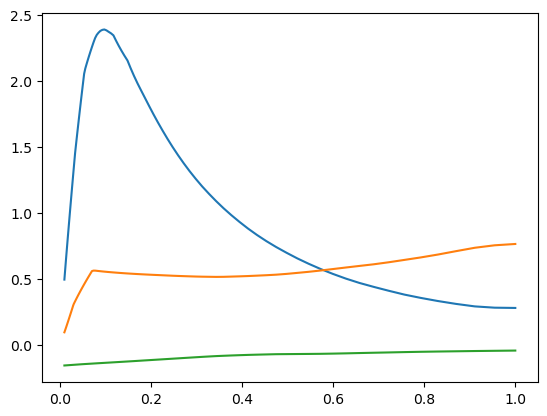

In [397]:
x_arr = np.logspace(-2,0,100, dtype=np.float32)
for j in range(len(alpha)):
    if log_transform:
        plt.plot(x_arr,[np.exp(alpha[j](torch.as_tensor(np.log(x_arr[i])).view(1).to('cpu')).detach().numpy()) for i in range(len(x_arr))])
        plt.plot(x_arr,[np.exp(beta[j](torch.as_tensor(np.log(x_arr[i])).view(1).to('cpu')).detach().numpy()) for i in range(len(x_arr))])
    else:
        plt.plot(x_arr,[alpha[j](torch.as_tensor(x_arr[i]).view(1).to('cpu')).detach().numpy() for i in range(len(x_arr))])
        plt.plot(x_arr,[beta[j](torch.as_tensor(x_arr[i]).view(1).to('cpu')).detach().numpy() for i in range(len(x_arr))])
    if symm_kind == 1:
        plt.plot(x_arr,[gamma[j](torch.as_tensor(x_arr[i]).view(1).to('cpu')).detach().numpy() for i in range(len(x_arr))])
#plt.yscale('log')
# plt.plot(x_arr,1./x_arr)
# plt.plot(x_arr,x_arr**2)

In [398]:
def get_model(test_k1,test_k2,test_k3):
    test_k1 = torch.as_tensor(test_k1).view(1).to('cpu')
    test_k2 = torch.as_tensor(test_k2).view(1).to('cpu')
    test_k3 = torch.as_tensor(test_k3).view(1).to('cpu')

    weights_list = loaded_model.model.weights
    test_result = 0.
    norm_result = 0.

    def t(x):
        if log_transform:
            return torch.exp(x)
        else:
            return x
    def g(x):
        if log_transform:
            return torch.log(x)
        else:
            return x

    for i in range(len(alpha)):
        if symm_kind==1:
            alpha_k1 = t(alpha[i](g(test_k1)))
            alpha_k2 = t(alpha[i](g(test_k2)))
            alpha_k3 = t(alpha[i](g(test_k3)))

            beta_k1  = t(beta[i](g(test_k1)))
            beta_k2  = t(beta[i](g(test_k2)))
            beta_k3  = t(beta[i](g(test_k3)))

            gamma_k1 = t(gamma[i](g(test_k1)))
            gamma_k2 = t(gamma[i](g(test_k2)))
            gamma_k3 = t(gamma[i](g(test_k3)))

            test_result += weights_list[i]*(alpha_k1*beta_k2*gamma_k3 + alpha_k2*beta_k3*gamma_k1 + alpha_k3*beta_k1*gamma_k2 + alpha_k1*beta_k3*gamma_k2 + alpha_k2*beta_k1*gamma_k3 + alpha_k3*beta_k2*gamma_k1)
            if add_norm:
                alpha0 = t(alpha[i](g(torch.ones(1))))
                beta0  = t(beta[i](g(torch.ones(1))))
                gamma0  = t(gamma[i](g(torch.ones(1))))
                norm_result += 6*weights_list[i]*(alpha0*beta0*gamma0)

        if symm_kind==2:
            alpha_k1 = t(alpha[i](g(test_k1)))
            alpha_k2 = t(alpha[i](g(test_k2)))
            alpha_k3 = t(alpha[i](g(test_k3)))

            beta_k1  = t(beta[i](g(test_k1)))
            beta_k2  = t(beta[i](g(test_k2)))
            beta_k3  = t(beta[i](g(test_k3)))

            test_result += weights_list[i]*(alpha_k1*beta_k2*beta_k3 + alpha_k2*beta_k3*beta_k1 + alpha_k3*beta_k1*beta_k2)
            if add_norm:
                alpha0 = t(alpha[i](g(torch.ones(1))))
                beta0  = t(beta[i](g(torch.ones(1))))
                norm_result += 3*weights_list[i]*(alpha0*beta0**2)
       
    if add_norm:
        return test_result.detach().numpy()/norm_result.detach().numpy()
    else:
        return test_result.detach().numpy()

In [399]:
if model=='collider':
    def get_true_model(k1,k2,k3, alpha=0.1):
        return   (k1**2/k2/k3) / (1. + (alpha*k1**2/k2/k3)**2) / 3\
                +(k2**2/k1/k3) / (1. + (alpha*k2**2/k1/k3)**2) / 3\
                +(k3**2/k1/k2) / (1. + (alpha*k3**2/k1/k2)**2) / 3
elif model=='eq':
    def get_true_model(k1, k2, k3):
        return (k1/k2 + k2/k1 + k1/k3 + k3/k1 + k2/k3 + k3/k2)\
             - (k1**2 / (k2 * k3) + k2**2 / (k1 * k3) + k3**2 / (k1 * k2)) - 2
elif model=='loc':
    def get_true_model(k1, k2, k3):
        return (k1**2 / (k2 * k3) + k2**2 / (k1 * k3) + k3**2 / (k1 * k2))/3.
else:
    raise Exception()

In [400]:
# Define the triangles
nT = 100
power = 1
x = np.linspace(x_min**power,1**power,nT)**(1./power)
y = np.linspace(x_min**power,1**power,nT)**(1./power)
XX, YY = np.meshgrid(x,y)
f = (np.abs(XX-YY)<=1.)*(1.<=XX+YY)*(XX<=YY)
xx = XX[f].ravel()
yy = YY[f].ravel()
# # Add edges
# for y in np.unique(yy):
#     if 1-y<x_min:
#         xx = np.append(xx,[y])
#         yy = np.append(yy,[y])
#     else:
#         xx = np.append(xx,[1-y,y])
#         yy = np.append(yy,[y,y])
# xx = np.append(xx,[0.5,1.0])
# yy = np.append(yy,[0.5,1.0])

shapes_nn = np.asarray([get_model(xx[i].astype(np.float32),yy[i].astype(np.float32),1.) for i in range(len(xx))]).ravel()
shapes_true = np.asarray([get_true_model(xx[i].astype(np.float32),yy[i].astype(np.float32),1.) for i in range(len(xx))])

In [401]:
from scipy.interpolate import LinearNDInterpolator
_interp_nn = LinearNDInterpolator(np.asarray([xx,yy]).T,shapes_nn, 0.)

def interp_nn(_x,_y):
    x = np.min([_x,_y],0)
    y = np.max([_x,_y],0)
    filt = (np.abs(x-y)<=1)*(1<=x+y)*(x<=y)
    out = np.zeros_like(x)
    out[filt] = _interp_nn(x[filt],y[filt])
    return out
def interp_true(_x,_y):
    x = np.min([_x,_y],0)
    y = np.max([_x,_y],0)
    filt = (np.abs(x-y)<=1)*(1<=x+y)*(x<=y)
    out = np.zeros_like(x)
    z = np.ones_like(x)
    out[filt] = get_true_model(x[filt],y[filt], z[filt])
    return out

x_arr = np.linspace(x_min,1,100)[None,:]
y_arr = np.linspace(x_min,1,100)[:,None]
x_arr = x_arr + 0.*y_arr
y_arr = y_arr + 0.*x_arr
from scipy.integrate import simpson
iint_nn = interp_nn(np.min([x_arr,y_arr],0),np.max([x_arr,y_arr],0))
iint_true = interp_true(np.min([x_arr,y_arr],0),np.max([x_arr,y_arr],0))

In [402]:
def inner(iint1, iint2):
    return simpson(simpson(iint1*iint2*(np.abs(x_arr-y_arr)<=1)*(1<=x_arr+y_arr)*(x_arr<=y_arr), x=x_arr[0], axis=0), x=y_arr[:,0])
inner_nn = inner(iint_nn, iint_nn)
inner_nt = inner(iint_nn, iint_true)
inner_tt = inner(iint_true, iint_true)

In [403]:
cos_nt = inner_nt/np.sqrt(inner_nn*inner_tt)
print(cos_nt)

0.9999941950934313


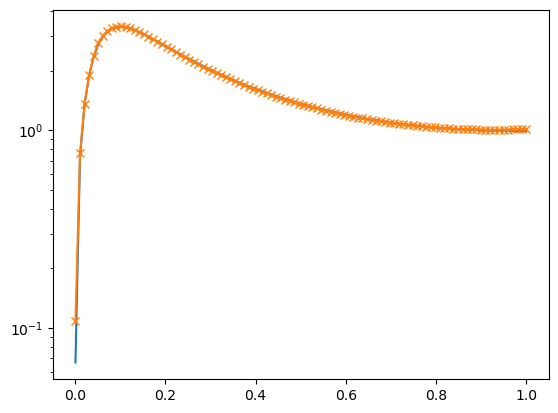

In [404]:
y_test = np.unique(yy)[-1]
plt.plot(xx[yy==y_test],shapes_true[yy==y_test])
plt.plot(xx[yy==y_test],shapes_nn[yy==y_test],marker='x')
plt.yscale('log')

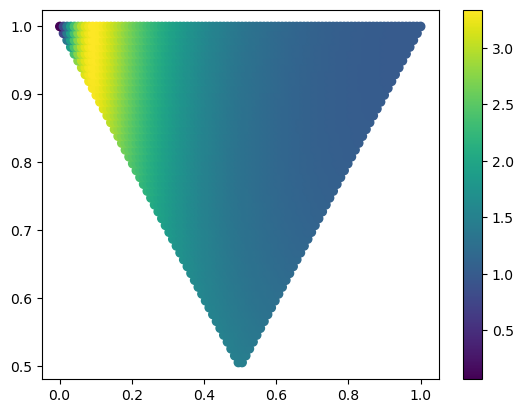

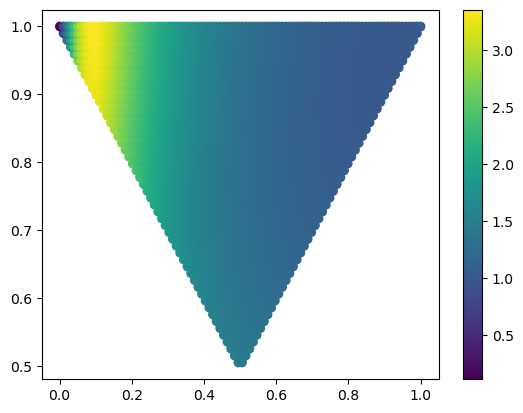

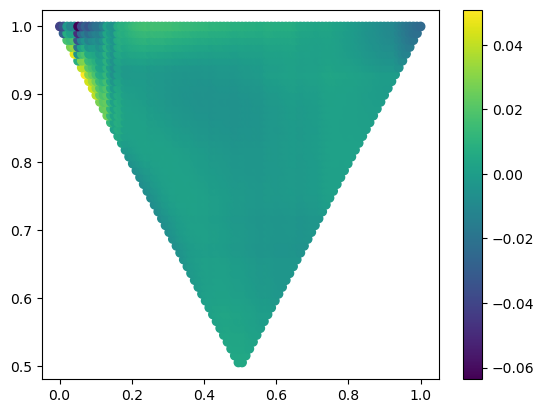

In [405]:
plt.scatter(xx,yy,c=shapes_true)
plt.colorbar()

plt.figure()
plt.scatter(xx,yy,c=shapes_nn)
plt.colorbar()


plt.figure()
plt.scatter(xx,yy,c=shapes_true-shapes_nn)
plt.colorbar()

In [7]:
alpha

ModuleList(
  (0-1): 2 x MLP(
    (net): Sequential(
      (0): Linear(in_features=1, out_features=128, bias=True)
      (1): ReLU()
      (2): Linear(in_features=128, out_features=64, bias=True)
      (3): ReLU()
      (4): Linear(in_features=64, out_features=1, bias=True)
    )
  )
)

In [3]:
# BK_FUNC = 'bk_eq'
# FUN_ARG = None
# bk_function = bk_function_equilateral

BK_FUNC = 'bk_sl_collider'
FUN_ARG = {'alpha': 0.1}
bk_function = bk_function_slow_collider_minus_eq
    
NUM_TERMS = 2
SYMM_KIND = 2
KMIN = 0.008

batch_size = 512

X_test, y_test = create_bk_dataset(grid_points=1000, func_name=BK_FUNC,\
                                   func_arg=FUN_ARG, scale_invariant=True, k2_sample_version=2)

test_dataset = TensorDataset(X_test, y_test)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

In [4]:
loaded_model.evaluate((test_loader))

1.1985986431904038e-05

In [5]:
loaded_model.test_mse((test_loader))

Test Mean Squared Error: 0.000012


1.1985986431904038e-05

In [6]:
alpha = loaded_model.model.alpha
beta = loaded_model.model.beta


In [7]:
### if you want to see some weights

# for name, param in alpha[1].named_parameters():
#     if param.requires_grad:  # Only print parameters that are trainable
#         print(f"Layer: {name}, Weights: {param.data}")

In [8]:
weights_list = loaded_model.model.weights
print(weights_list[0], weights_list[1])

tensor(0.3769, device='cuda:0', grad_fn=<SelectBackward0>) tensor(0.3900, device='cuda:0', grad_fn=<SelectBackward0>)


In [9]:
print('========== alpha summary ========')
summary(alpha[0], [[1,1,1]])

print('========== beta summary ========')
summary(beta[0], [[1,1,1]])

========== alpha summary ========
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1            [-1, 1, 1, 128]             256
              ReLU-2            [-1, 1, 1, 128]               0
            Linear-3             [-1, 1, 1, 64]           8,256
              ReLU-4             [-1, 1, 1, 64]               0
            Linear-5              [-1, 1, 1, 1]              65
Total params: 8,577
Trainable params: 8,577
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.03
Estimated Total Size (MB): 0.04
----------------------------------------------------------------
========== beta summary ========
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1            [-1, 1, 1,

In [10]:
# alpha[0].to('cpu')
# beta[0].to('cpu')
# weights_list[0].to('cpu')

In [11]:
test_k_val = [0.8018, 0.9012, 1.0000]
test_k1 = test_k_val[0]
test_k2 = test_k_val[1]
test_k3 = test_k_val[2]

test_k_val = torch.as_tensor(test_k_val).to('cuda')
test_k1 = torch.as_tensor(test_k1).view(1).to('cuda')
test_k2 = torch.as_tensor(test_k2).view(1).to('cuda')
test_k3 = torch.as_tensor(test_k3).view(1).to('cuda')


In [12]:
test_result = 0.

for i in range(2):

    alpha_k1 = alpha[i](test_k1)
    beta_k2  = beta[i](test_k2)
    beta_k3  = beta[i](test_k3)

    alpha_k2 = alpha[i](test_k2)
    beta_k1  = beta[i](test_k1)
    beta_k2  = beta[i](test_k2)

    alpha_k3 = alpha[i](test_k3)
    beta_k1  = beta[i](test_k1)
    beta_k2  = beta[i](test_k2)

    test_result += weights_list[i]*(alpha_k1*beta_k2*beta_k3 + alpha_k3*beta_k1*beta_k2 + alpha_k3*beta_k1*beta_k2)

print(test_result)

tensor([1.0411], device='cuda:0', grad_fn=<AddBackward0>)


In [13]:
bk_function(test_k_val[0],test_k_val[1],test_k_val[2])

tensor(1.0234, device='cuda:0')

# plot differences along k1=k2

In [14]:
def get_bk_k1_k2(k1k2=0.1):
    # get the bk from the NN with k1=k2
    result = 0.
    for i in range(2):
        tmp1 = alpha[i](k1k2)
        tmp2  = beta[i](k1k2)
        tmp3  = beta[i](test_k3)

        tmp4 = alpha[i](k1k2)
        tmp5  = beta[i](k1k2)
        tmp6  = beta[i](test_k2)

        tmp7 = alpha[i](test_k3)
        tmp8  = beta[i](k1k2)
        tmp9  = beta[i](k1k2)
        result += weights_list[i]*(tmp1*tmp2*tmp3 + tmp4*tmp5*tmp6 + tmp7*tmp8*tmp9)
    return result

In [15]:
test_k1k2 = np.linspace(0.51, 1., 100).astype(float)
test_result_k1k2 = []
for k1k2 in test_k1k2:
    k1k2 = torch.as_tensor(k1k2).view(1).to('cuda').float()
    test_result_k1k2.append(get_bk_k1_k2(k1k2).detach().cpu().numpy()[0])
test_result_k1k2 = np.array(test_result_k1k2)


true_result_k1k2 = []
for k1k2 in test_k1k2:
    true_result_k1k2.append(bk_function(k1k2, k1k2, 1.0))
    
true_result_k1k2 = np.array(true_result_k1k2)

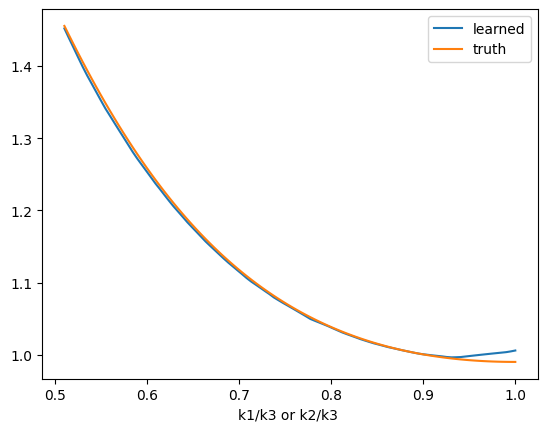

mean of abs residual 0.0033170229805758113


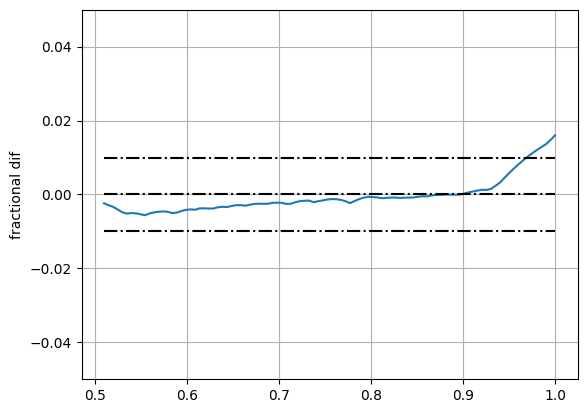

In [16]:
plt.plot(test_k1k2, test_result_k1k2, label='learned')
plt.plot(test_k1k2, true_result_k1k2, label='truth')

plt.xlabel('k1/k3 or k2/k3 ')
plt.legend()
plt.show()

plt.plot(test_k1k2, test_result_k1k2/true_result_k1k2-1)
plt.ylabel('fractional dif')
plt.ylim(-0.05, 0.05)

plt.plot(test_k1k2, 0.01*np.ones(test_k1k2.shape[0]), ls='-.', c='black')
plt.plot(test_k1k2, -0.01*np.ones(test_k1k2.shape[0]), ls='-.', c='black')
plt.plot(test_k1k2, 0.*np.ones(test_k1k2.shape[0]), ls='-.', c='black')

plt.grid()

print('mean of abs residual', np.mean(np.abs(test_result_k1k2/true_result_k1k2-1)))

# plot differences along k1, fixe k2=k3=1.

In [17]:
def get_bk_squeezed(k1k2=0.1):
    # get the bk from the NN with k1=k2
    result = 0.
    for i in range(2):
        tmp1 = alpha[i](k1k2)
        tmp2  = beta[i](test_k3)
        tmp3  = beta[i](test_k3)

        tmp4 = alpha[i](test_k3)
        tmp5  = beta[i](k1k2)
        tmp6  = beta[i](test_k2)

        tmp7 = alpha[i](test_k3)
        tmp8  = beta[i](test_k3)
        tmp9  = beta[i](k1k2)
        result += weights_list[i]*(tmp1*tmp2*tmp3 + tmp4*tmp5*tmp6 + tmp7*tmp8*tmp9)
    return result

In [18]:
test_k1k2 = np.linspace(0.01, 1., 100).astype(float)
test_result_k1k2 = []
for k1k2 in test_k1k2:
    k1k2 = torch.as_tensor(k1k2).view(1).to('cuda').float()
    test_result_k1k2.append(get_bk_squeezed(k1k2).detach().cpu().numpy()[0])
test_result_k1k2 = np.array(test_result_k1k2)


true_result_k1k2 = []
for k1k2 in test_k1k2:
    true_result_k1k2.append(bk_function(k1k2, 1.0, 1.0))
    
true_result_k1k2 = np.array(true_result_k1k2)

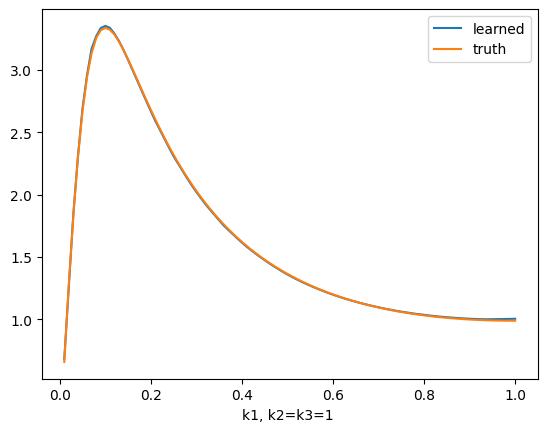

mean of abs residual 0.004446592565214514


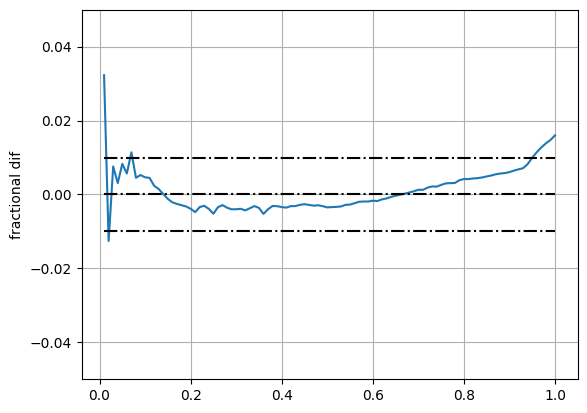

In [19]:
plt.plot(test_k1k2, test_result_k1k2, label='learned')
plt.plot(test_k1k2, true_result_k1k2, label='truth')

plt.xlabel('k1, k2=k3=1 ')
plt.legend()
plt.show()

plt.plot(test_k1k2, test_result_k1k2/true_result_k1k2-1)
plt.ylabel('fractional dif')
plt.ylim(-0.05, 0.05)

plt.plot(test_k1k2, 0.01*np.ones(test_k1k2.shape[0]), ls='-.', c='black')
plt.plot(test_k1k2, -0.01*np.ones(test_k1k2.shape[0]), ls='-.', c='black')
plt.plot(test_k1k2, 0.*np.ones(test_k1k2.shape[0]), ls='-.', c='black')

plt.grid()

print('mean of abs residual', np.mean(np.abs(test_result_k1k2/true_result_k1k2-1)))

In [20]:
weights_list

Parameter containing:
tensor([0.3769, 0.3900], device='cuda:0', requires_grad=True)

# 3d Plot

In [21]:
def plot_3d_data(xy_vals, bk, method='scatter', title='3D Plot'):
    """
    Plot 3D data with color mapping
    
    Args:
        k_vals: array of shape (N, 2) containing x and y coordinates
        bk: array of shape (N,) containing z values
        method: 'scatter' or 'surface'
        title: plot title
    """
    fig = plt.figure(figsize=(10, 8))
    ax = plt.axes(projection='3d')
    
    # Set viewing angle
    ax.azim = -75
    ax.dist = 10
    ax.elev = 30
    
    x = xy_vals[:, 0]
    y = xy_vals[:, 1]
    z = bk.flatten()
    
    if method == 'scatter':
        # Create scatter plot with color mapping
        scatter = ax.scatter3D(x, y, z, 
                             c=z,  # Color by z value
                             cmap='viridis',  # Choose colormap
                             s=30,  # Marker size
                             alpha=0.6)  # Transparency
        
        # Add colorbar
        fig.colorbar(scatter, ax=ax, label='Z Value')
        
    elif method == 'surface':
        # Create triangulation surface plot
        surf = ax.plot_trisurf(x, y, z,
                             cmap='viridis',
                             alpha=0.8)
        
        # Add colorbar
        fig.colorbar(surf, ax=ax, label='Z Value')
    
    # Labels and title
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title(title)
    
    # Set axis limits if needed
    # ax.set_xlim([x.min(), x.max()])
    # ax.set_ylim([y.min(), y.max()])
    # ax.set_zlim([z.min(), z.max()])
    
    plt.show()

/tmp/ipykernel_1207582/485922144.py:16: MatplotlibDeprecationWarning: The dist attribute was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  ax.dist = 10


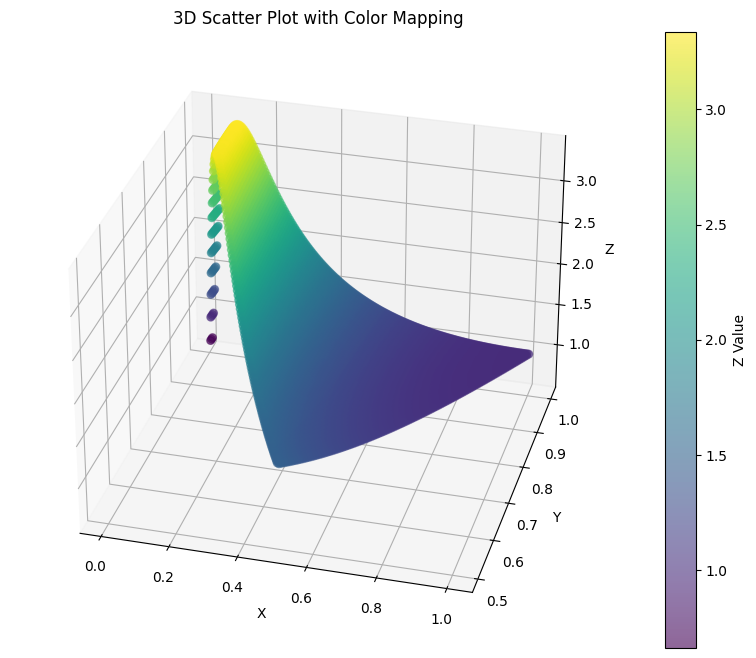

In [22]:
k_vals, bk = create_bk_dataset(grid_points=200, func_name=BK_FUNC, func_arg=FUN_ARG, scale_invariant=True)
# Generate sample data
n_points = k_vals.shape[0]
x = k_vals[:,0]
y = k_vals[:,1]
z = bk.flatten()

xy_vals = np.column_stack((x, y))

# Create both types of plots
plot_3d_data(xy_vals, z, method='scatter', title='3D Scatter Plot with Color Mapping')


In [23]:
bk_predicted = loaded_model.model(k_vals.to('cuda'))
diff = z-bk_predicted.detach().cpu().numpy().flatten()

print('mean of the diff is: ',   np.mean(np.abs(diff.numpy())) )

mean of the diff is:  0.0019019053


/tmp/ipykernel_1207582/485922144.py:16: MatplotlibDeprecationWarning: The dist attribute was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  ax.dist = 10


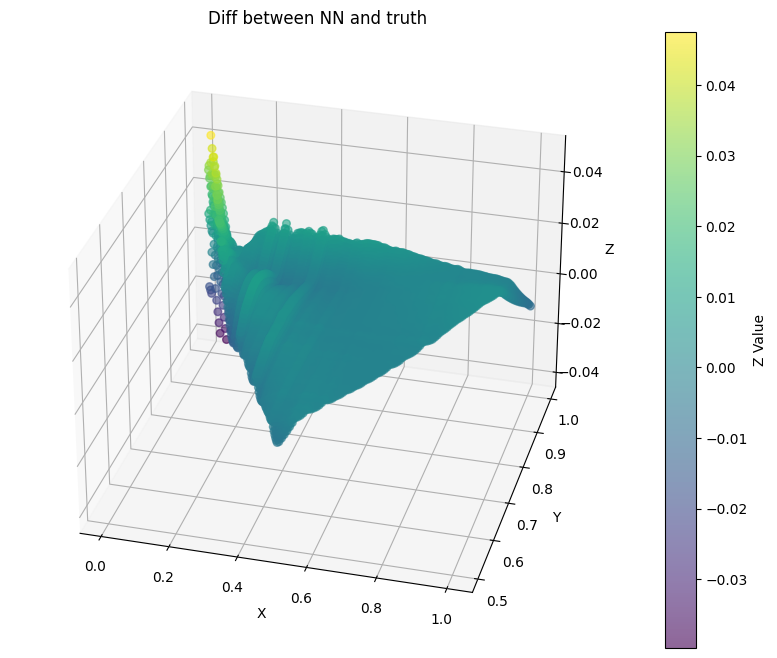

In [24]:
plot_3d_data(xy_vals, diff, method='scatter', title='Diff between NN and truth')


In [25]:
# Delta fNL

loaded_model.get_Delta_fNL(test_loader, KMIN)

/global/homes/k/kunhaoz/miniconda3/envs/py39/lib/python3.9/site-packages/scipy/integrate/_quadpack_py.py:1225: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
/global/homes/k/kunhaoz/miniconda3/envs/py39/lib/python3.9/site-packages/scipy/integrate/_quadpack_py.py:1225: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
/global/homes/k/kunhaoz/miniconda3/envs/py39/lib/python3.9/site-packages/scipy/integrate/_quadpack_py

Calculating the inner product with interpolation
true <B|B> is 0.6605076091947527
The bias estimation of fNL is approximately Delta_fNL =  0.002100305241405876


4.411282107076995e-06

In [25]:
# Delta fNL

loaded_model.get_Delta_fNL(test_loader, KMIN, method = 'direct_sum')

Please ensure the k samples are uniform in order to use direct sum
The bias estimation of fNL is approximately Delta_fNL =   0.0021286291770256055


0.0021286291770256055